## Schelling model: 

Every agent can have one of the binary attributes (-1 or 1).
A 2 dimensional lattice represesnts a city/locality over which all the agents are randomly palced.
Happiness of each agent is depends on the number of neighbouring agents with same attribute, i.e. agent is happy if 50% of it's neighbouring agents have identical spin like him. If he is not happy it moves to a new random vacant place where it would become happy.

we run the simulaiton till a stable condition is reached, i.e. all the agents are happy.


*Source code is in the end of the report 

## Simulation:

In [100]:
print(len(sModel.lattice))

30


In [4]:
#Data
size = 30
probabilities = [0.1,0.2,0.3,0.4,0.5,0.6]
results = {}
results['probabilities'] = []
results['pairCounts'] = []
results['beginningPairCounts'] = []
results['errors'] = []
for p in probabilities:
    print(p,":")
    pairCount = []
    begpairCount = []
    for i in range(0,100):
        print(i,":->")
        patience = 0
        sModel = SchellingModel(size = size,vacantProb = p)
        begpairCount.append(sModel.getOpositePairCounts())
        while True:
            print(".", end=" ")
            sModel.runSimulation(limit=900)
            patience+=1
            if len(sModel.getUnHappyAgents()) == 0:
                pairCount.append(sModel.getOpositePairCounts())
                break
    print(p,pairCount)
    results['probabilities'].append(p)
    results['pairCounts'].append(pairCount)
    results['beginningPairCounts'].append(begpairCount)
    results['errors'].append(np.std(begpairCount)/20)


0.1 :
0 :->
. . . . . . . 1 :->
. . . . . . 2 :->
. . . . . . . . . . 3 :->
. . . . . . . 4 :->
. . . . . . . . 5 :->
. . . . . . . . 6 :->
. . . . . . . 7 :->
. . . . . . . . . 8 :->
. . . . . . . . . 9 :->
. . . . . . . . . . . 10 :->
. . . . . . 11 :->
. . . . . . . 12 :->
. . . . . . . . . . . . 13 :->
. . . . . . . . 14 :->
. . . . . . . . . . . 15 :->
. . . . . . . 16 :->
. . . . . . . 17 :->
. . . . . . . . . 18 :->
. . . . . . 19 :->
. . . . . . 20 :->
. . . . . 21 :->
. . . . . . 22 :->
. . . . . . . . 23 :->
. . . . . . . . . . . . . 24 :->
. . . . . . . . 25 :->
. . . . . . . 26 :->
. . . . . . 27 :->
. . . . . . 28 :->
. . . . . . 29 :->
. . . . . . . . . . . . . . . . . . 30 :->
. . . . . . . . 31 :->
. . . . . . 32 :->
. . . . . . . . 33 :->
. . . . . . . . 34 :->
. . . . . 35 :->
. . . . . . 36 :->
. . . . . . . 37 :->
. . . . . . . 38 :->
. . . . . . . . . 39 :->
. . . . . . 40 :->
. . . . . . 41 :->
. . . . . . . . . 42 :->
. . . . . . . . . 43 :->
. . . . . . . . . 44

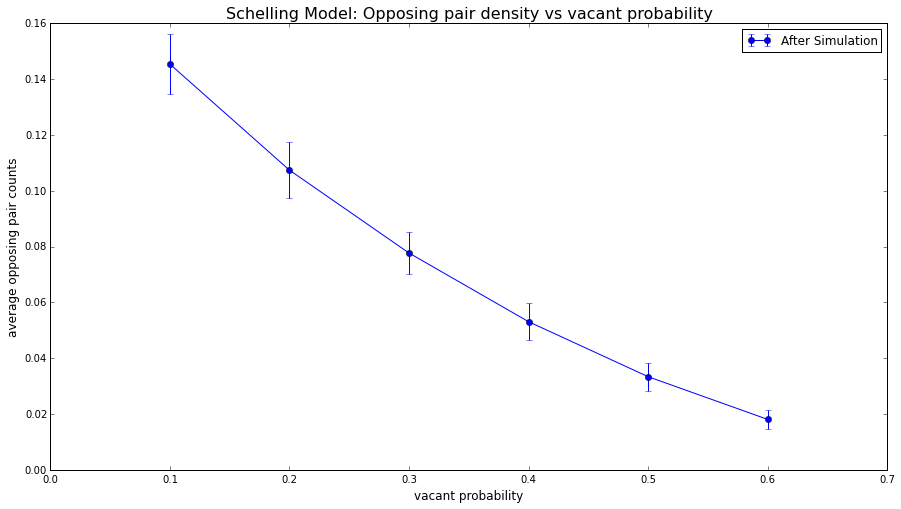

In [6]:
#Plotting
%matplotlib inline
import matplotlib.pyplot as plt
# Plot 1 subplots
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(15, 8))# Leave space for the legend on bottom and remove some space from the top
#axes.plot(results['probabilities'],[p/1800 for p in results["beginningPairCounts"]],marker='o', label="Before Simulation")
opposingPairDensity = []
stds = []
for p in results["pairCounts"]:
    density = [pth/1800 for pth in p ]
    opposingPairDensity.append(np.mean(density))
    stds.append(np.std(density))
axes.errorbar(results['probabilities'],opposingPairDensity,yerr=stds,fmt='o-', label="After Simulation")
ticks = np.arange(0,np.max(results['probabilities'])+0.2,0.1)
plt.xticks(ticks)
plt.xlabel('vacant probability', fontsize=12)
plt.ylabel('average opposing pair counts', fontsize=12)
plt.legend(loc='best')
plt.title("Schelling Model: Opposing pair density vs vacant probability",fontsize=16)

### Lattice visual with vacant probability 0.2

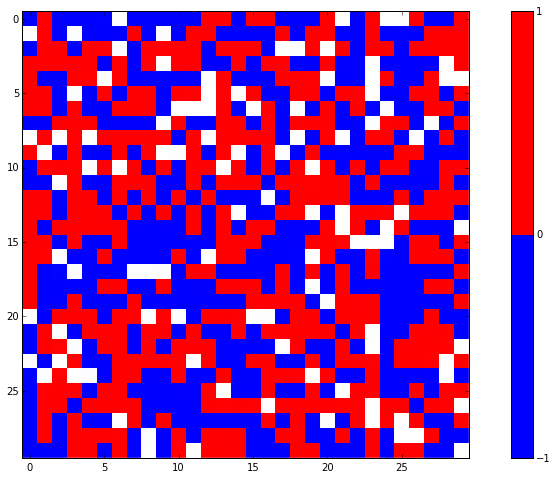

After 900 runs: 


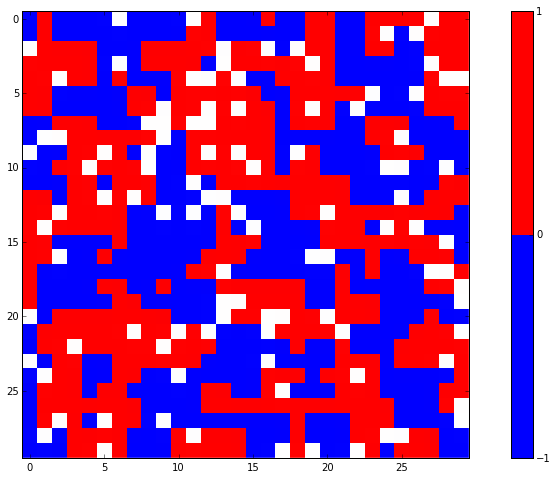

In [6]:
from matplotlib import colors
sModel = SchellingModel(size = size,vacantProb = 0.1)
displayLattice(sModel.lattice)
sModel.runSimulation(limit=900)
print("After 900 runs: ")
displayLattice(sModel.lattice)

In [7]:
sModel.runSimulation(limit=900)
print(sModel.getUnHappyAgents())

[(0, 1), (0, 16), (2, 23), (4, 6), (5, 9), (5, 16), (7, 7), (9, 2), (9, 19), (9, 25), (11, 5), (11, 12), (13, 29), (16, 5), (16, 29), (17, 23), (17, 29), (18, 6), (18, 9), (18, 21), (18, 22), (21, 11), (21, 17), (23, 1), (24, 18), (24, 28), (25, 4), (25, 7), (25, 19), (25, 28), (27, 1), (27, 4)]


In [8]:
def getNeighbours(p):
    i,j = p
    return [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
def beingInLattice(p):
    x,y = p
    return x >=0 and y >=0 and x <len(a) and y < len(b)

a= np.arange(0,30)
b= np.arange(0,30)
pairs = [(x, y) for x in a for y in b if beingInLattice((x,y)) ]
#print(pairs)
neigh={}
for p in pairs:
    neigh[p] = [n for n in getNeighbours(p) if beingInLattice(n)]


In [89]:
s = 0
for k in neigh:
    s+= len(neigh[k])
print(s,s/2)

3480 1740.0


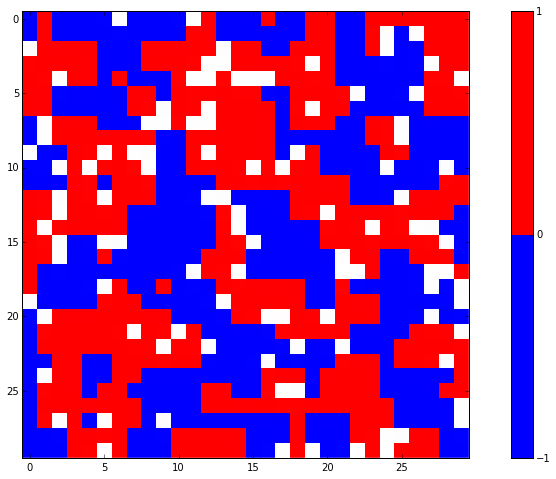

In [9]:
displayLattice(sModel.lattice)

### Lattice visual with vacant probability 0.5

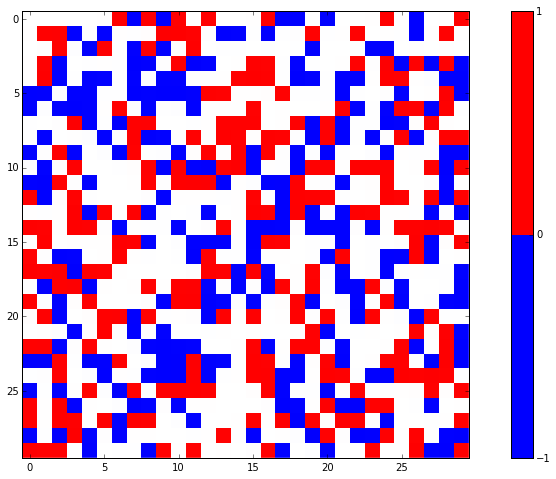

After 900 runs: 


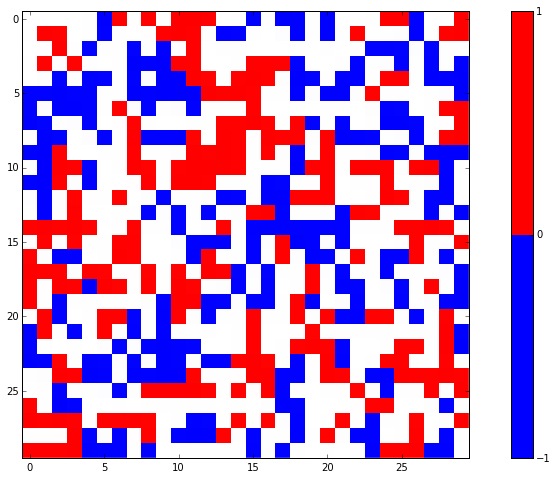

In [10]:
sModel = SchellingModel(size = size,vacantProb = 0.5)
displayLattice(sModel.lattice)
sModel.runSimulation(limit=900)
print("After 900 runs: ")
displayLattice(sModel.lattice)

### Conclusion:

As can be observed from the visuals and plots, Agents tend to seggregate towards according to their attributes. The change between the densities between before and after simulaitons is more pronounced when the site is crowded, i.e. there are very less places to move, and decreases as the total population sparsity (here characterized by the probability of vacant locations)increases.

## Source code:

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random
class SchellingModel:
    def __init__(self,vacantProb = 0.5,size = 3):
        self.vacantProb = vacantProb
        self.size = size
        self.lattice = self.initializeLattice(size,vacantProb)
        
    def initializeLattice(self,size,probability):
        a = np.zeros((size,size))
        for i in range(0,size):
            for j in range(0,size):
                if np.random.random() <= probability:
                    a[i,j] = 0
                else:
                    if np.random.random() <= 0.5:
                        a[i,j] = 1
                    else:
                        a[i,j] = -1
        return a
    
    def getNeighbouringAttributes(self,i,j):
        options = []
        neighbours = [(i-1,j),(i+1,j),(i,j+1),(i,j-1)]
        attributes = [self.lattice[x,y] for x,y in neighbours if (x >= 0 and y >= 0) and x <self.size and y < self.size]
        return attributes

    def isHappy(self,agent,preference = None):
        if preference ==None:
            preference = self.lattice[agent[0],agent[1]]
        neighbourhood = self.getNeighbouringAttributes(agent[0],agent[1])
        occupied = len(neighbourhood) - neighbourhood.count(0)
        if occupied == 0 or neighbourhood.count(preference)/occupied >= 0.5:
            return True
        else:
            return False
    
    def getRandomUnHappyAgent(self):
        agents = self.getOccupiedPositions(self.lattice)
        randomLocation = np.random.random_integers(0,len(agents)-1)
        if self.isHappy(agents[randomLocation]) == False:
            return agents[randomLocation]
        else:
            #print("Returning without update")
            return None
    
    def getRandomViableLocation(self,agent):
        locations = self.getVacantPositions(self.lattice)
        viableLocations = [location for location in locations if self.isHappy(location,self.lattice[agent[0],agent[1]])]
        return viableLocations[random.randrange(0,len(viableLocations))]
    
    def executeUpdate(self):
        agent = self.getRandomUnHappyAgent()
        if agent==None:
            return
        location =self.getRandomViableLocation(agent)
        self.move(agent,location)
    
    def move(self,agent,location):
        self.lattice[location[0],location[1]] = self.lattice[agent[0],agent[1]]
        self.lattice[agent[0],agent[1]] = 0
    
    def getVacantPositions(self,lattice):
        a = np.where(lattice==0)
        return list(zip(a[0],a[1]))
    
    def getOccupiedPositions(self,lattice):
        a = np.where(lattice!=0)
        return list(zip(a[0],a[1]))
    
    def getUnHappyAgents(self):
        agents = self.getOccupiedPositions(self.lattice)
        unHappyAgents = [agent for agent in agents if self.isHappy(agent) == False]
        return unHappyAgents
        
    def runSimulation(self,limit=100):
        patience = 0
        while(patience < limit):
            self.executeUpdate()
            patience +=1
            #print(patience)
        
    def getOpositePairCounts(self):
        agents = self.getOccupiedPositions(self.lattice)
        opposingPairs = [(x, y) for x in agents for y in agents if self.areNeighbours(x,y) and self.lattice[x[0],x[1]] != self.lattice[y[0],y[1]]]
        return len(opposingPairs)/2
    
    def areNeighbours(self,x,y):
        i,j = x
        if y in [(i-1,j),(i+1,j),(i,j+1),(i,j-1)]:
            return True
        else:
            return False
    
def displayLattice(lattice):
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(15, 8))# Leave space for the legend on bottom and remove some space from the top
    cmap = colors.ListedColormap(['blue','white', 'red'])
    bounds=[-1,0,1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    # tell imshow about color map so that only set colors are used
    img = plt.imshow(lattice,cmap=cmap,interpolation='none')
    # make a color bar
    plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-1, 0, 1])
    plt.show()


In [47]:
model = SchellingModel(vacantProb = 0.2, size=3)

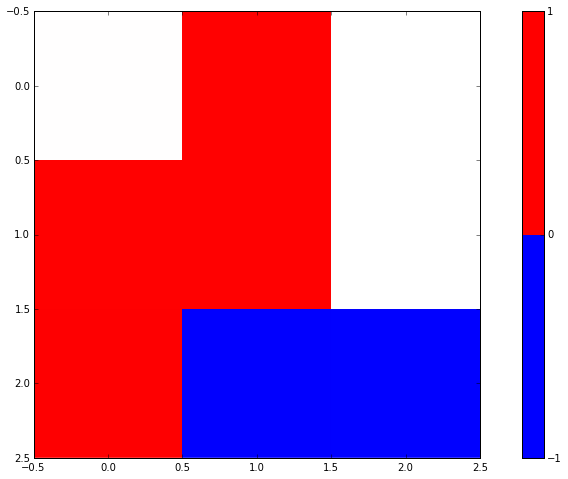

In [48]:
displayLattice(model.lattice)

In [49]:
model.getOpositePairCounts()

2.0

In [38]:
model.runSimulation(limit=900)
len(model.getUnHappyAgents())

0

In [54]:
#a = [205.0, 192.0, 198.0, 171.0, 194.0, 208.0, 163.0, 198.0, 194.0, 171.0, 202.0, 211.0, 208.0, 196.0, 191.0, 210.0, 198.0, 187.0, 151.0, 186.0]
np.mean([i/1746 for i in a])

0.1097938144329897